In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import nan

from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#Reading the dataset

data = pd.read_csv('sample.txt', sep = ';',
                  parse_dates = True,
                  low_memory = False)

FileNotFoundError: ignored

In [ ]:
#printing top rows

data.head()


NameError: ignored

In [ ]:
#concatenating the date and time columns to 'date_time' columns

data['date_time'] = data['Date'].str.cat(data['Time'], sep= ' ')
data.drop(['Date', 'Time'], inplace= True, axis = 1)
data.head()

,active,voltage,void,date_time
0,2748286.84,6003707.5,NaN,2021-03-13 21:47:17
1,2728327.90,6007809.0,NaN,2021-03-13 21:47:17
2,2728365.43,6011337.5,NaN,2021-03-13 21:47:17
3,2728349.01,6009820.0,NaN,2021-03-13 21:47:17
4,2738306.78,6005731.5,NaN,2021-03-13 21:47:18


In [ ]:
data.drop(['void'], inplace= True, axis = 1)


In [ ]:
data.head()

,active,voltage,date_time
0,2748286.84,6003707.5,2021-03-13 21:47:17
1,2728327.90,6007809.0,2021-03-13 21:47:17
2,2728365.43,6011337.5,2021-03-13 21:47:17
3,2728349.01,6009820.0,2021-03-13 21:47:17
4,2738306.78,6005731.5,2021-03-13 21:47:18


In [ ]:
data.set_index(['date_time'], inplace=True)
data.head()

,active,voltage
date_time,,
2021-03-13 21:47:17,2748286.84,6003707.5
2021-03-13 21:47:17,2728327.90,6007809.0
2021-03-13 21:47:17,2728365.43,6011337.5
2021-03-13 21:47:17,2728349.01,6009820.0
2021-03-13 21:47:18,2738306.78,6005731.5


In [ ]:
#replacing each '?'characters with NaN value

data.replace('?', nan, inplace=True)

In [ ]:
#This will allow us to work with the data as one array of floating point values rather than mixed types (less efficient.)

data = data.astype('float')

In [ ]:
#information of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73 entries, 2021-03-13 21:47:17 to 2021-03-13 21:47:31
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   active   73 non-null     float64
 1   voltage  73 non-null     float64
dtypes: float64(2)
memory usage: 1.7+ KB


In [ ]:
#checking the null values
np.isnan(data).sum()

active     0
voltage    0
dtype: int64

In [ ]:
def fill_missing(data):
    one_day = 24*60
    for row in range(data.shape[0]):
        for col in range(data.shape[1]):
            if np.isnan(data[row, col]):
                data[row, col] = data[row-one_day, col]

In [ ]:
fill_missing(data.values)

In [ ]:
#checking the nan values

np.isnan(data).sum()

active     0
voltage    0
dtype: int64

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 73 entries, 2021-03-13 21:47:17 to 2021-03-13 21:47:31
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   active   73 non-null     float64
 1   voltage  73 non-null     float64
dtypes: float64(2)
memory usage: 1.7+ KB


In [ ]:
#printing the shape of the data
data.shape

(73, 2)

In [ ]:
data.head()

,active,voltage
date_time,,
2021-03-13 21:47:17,2748286.84,6003707.5
2021-03-13 21:47:17,2728327.90,6007809.0
2021-03-13 21:47:17,2728365.43,6011337.5
2021-03-13 21:47:17,2728349.01,6009820.0
2021-03-13 21:47:18,2738306.78,6005731.5


In [ ]:
#conversion of dataframe to .csv

data.to_csv('cleaned_data.csv')

In [ ]:
#reading the dataset

dataset = pd.read_csv('cleaned_data.csv', parse_dates = True, index_col = 'date_time', low_memory = False)

In [ ]:
#printing the top rows

dataset.head()

,active,voltage
date_time,,
2021-03-13 21:47:17,2748286.84,6003707.5
2021-03-13 21:47:17,2728327.90,6007809.0
2021-03-13 21:47:17,2728365.43,6011337.5
2021-03-13 21:47:17,2728349.01,6009820.0
2021-03-13 21:47:18,2738306.78,6005731.5


In [ ]:
#printing the bottom rows
dataset.tail()

,active,voltage
date_time,,
2021-03-13 21:47:31,2449339.04,6029022.5
2021-03-13 21:47:31,2449310.89,6030507.0
2021-03-13 21:47:31,2439330.83,6029467.5
2021-03-13 21:47:31,2439351.94,6028302.0
2021-03-13 21:47:31,2449329.66,6029530.5


In [ ]:
#Downsampling the data into dáy-wise bins and sum the values of the timestamps falling into a bin.

data = dataset.resample('D').sum()

In [ ]:
#data after sampling it into daywise manner

data.head()

,active,voltage
date_time,,
2021-03-13,1.929118e+08,439400559.5


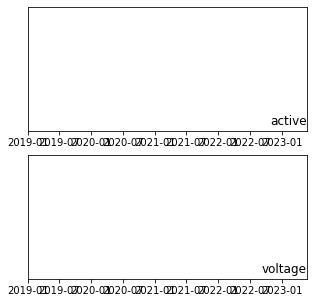

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))

for i in range(len(data.columns)):
    plt.subplot(len(data.columns), 1, i+1)
    name = data.columns[i]
    plt.plot(data[name])
    plt.title(name, y=0, loc = 'right')
    plt.yticks([])
plt.show()
fig.tight_layout()

In [ ]:
#we have considered 5 years here

years = ['2021']

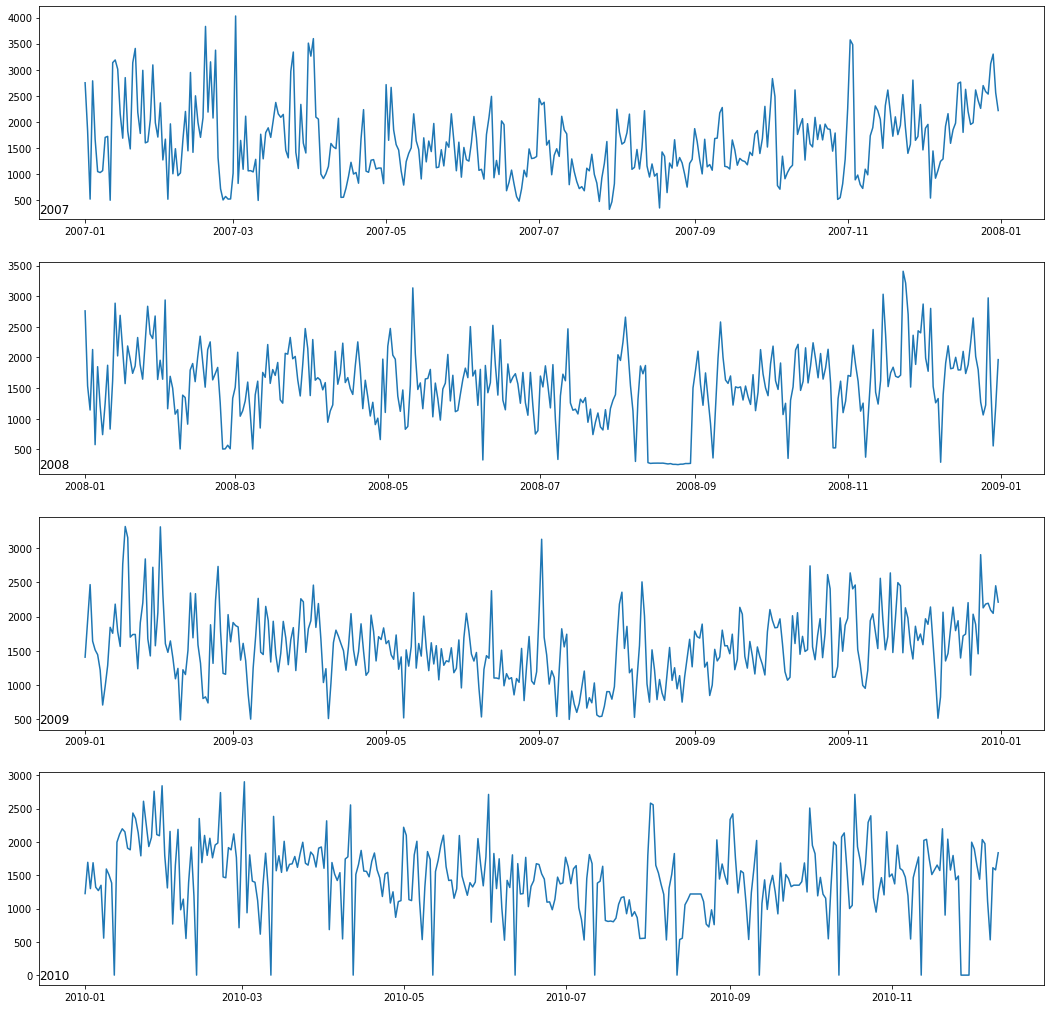

In [ ]:
fig, ax = plt.subplots(figsize=(18,18))

for i in range(len(years)):
    plt.subplot(len(years), 1, i+1)
    year = years[i]
    active_power_data = data[str(year)]
    plt.plot(active_power_data['Global_active_power'])
    plt.title(str(year), y = 0, loc = 'left')
plt.show()
fig.tight_layout()

In [ ]:
#for year 2006

data['2006']

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0
2006-12-21,1723.288,144.434,347096.41,7266.4,1765.0,2692.0,10456.0
2006-12-22,2341.338,186.906,347305.75,9897.0,3151.0,350.0,11131.0
2006-12-23,4773.386,221.470,345795.95,20200.4,2669.0,425.0,14726.0
2006-12-24,2550.012,149.900,348029.91,11002.2,1703.0,5082.0,6891.0


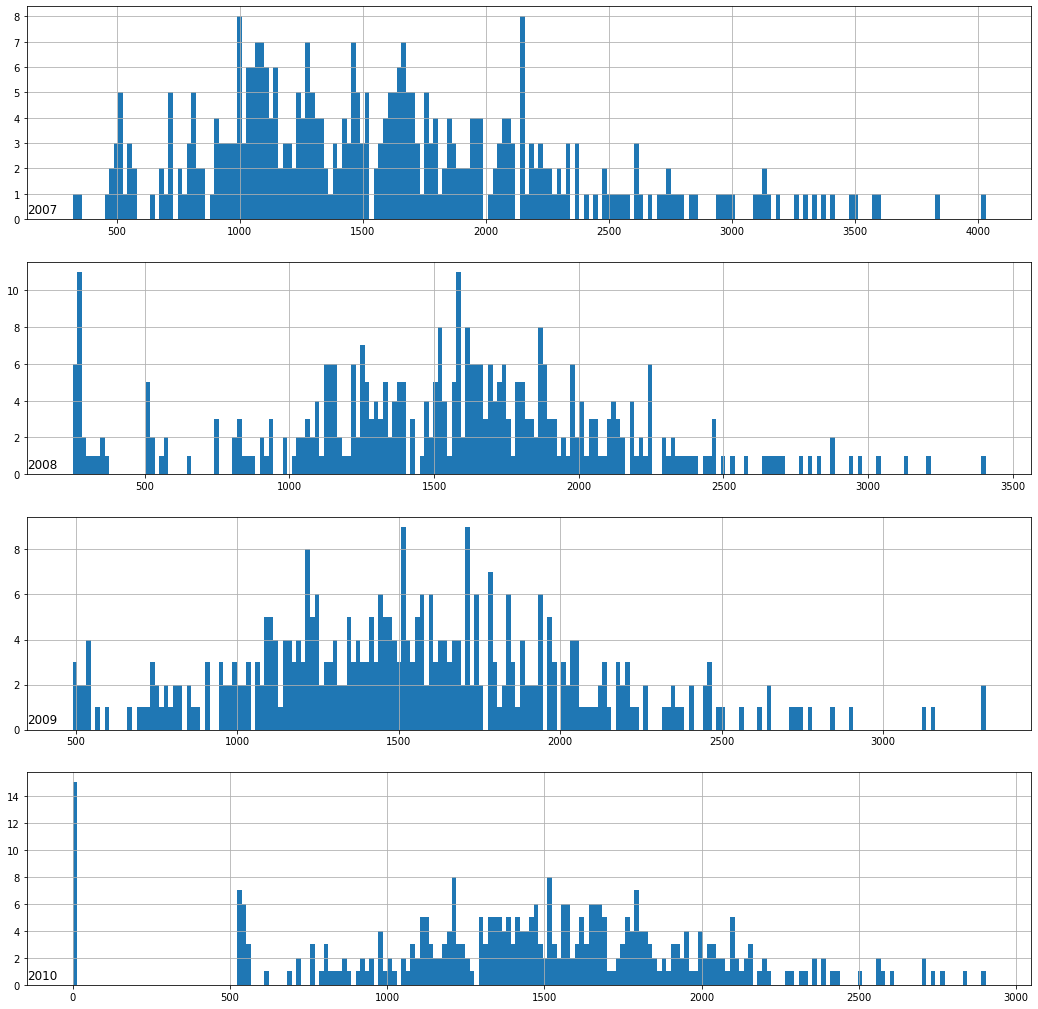

In [ ]:
fig, ax = plt.subplots(figsize=(18,18))

for i in range(len(years)):
    plt.subplot(len(years), 1, i+1)
    year = years[i]
    active_power_data = data[str(year)]
    active_power_data['Global_active_power'].hist(bins = 200)
    plt.title(str(year), y = 0, loc = 'left')
plt.show()
fig.tight_layout()


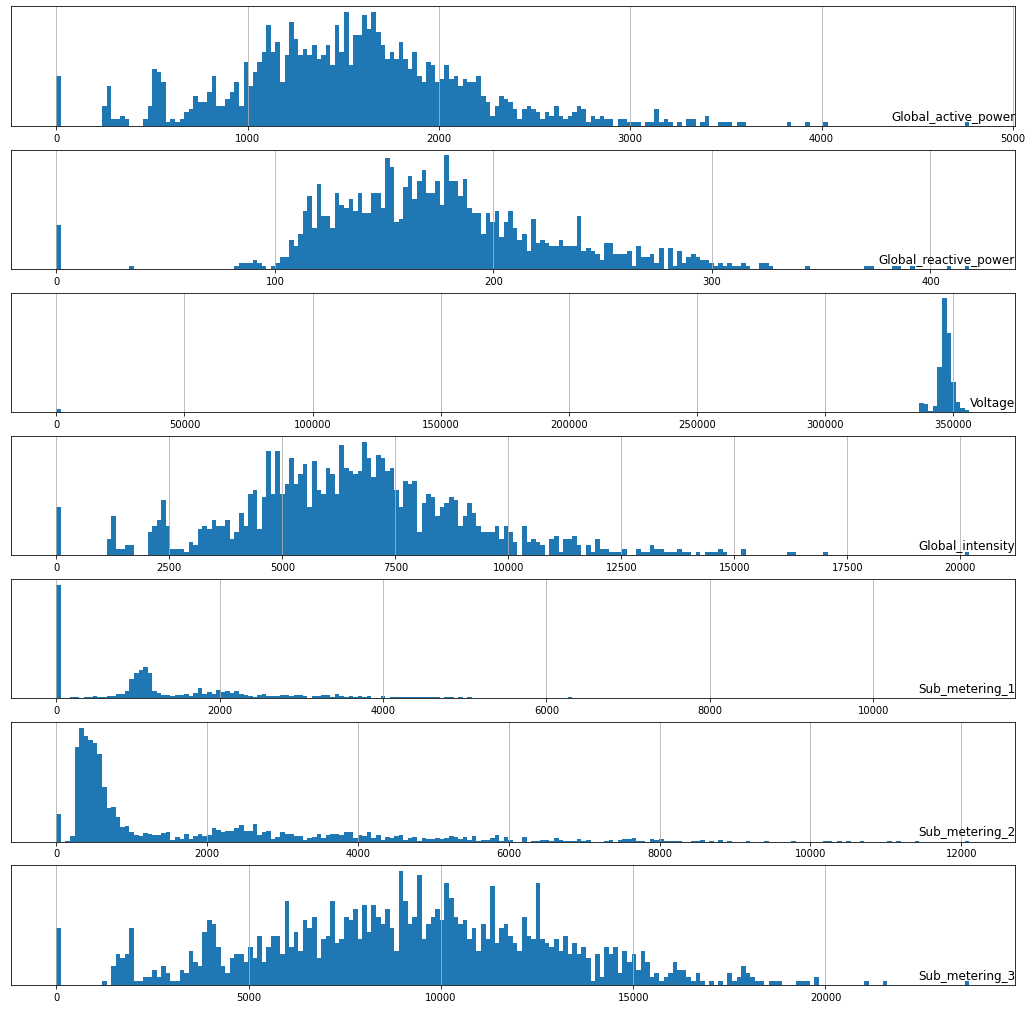

In [ ]:
fig, ax = plt.subplots(figsize=(18,18))

for i in range(len(data.columns)):
    plt.subplot(len(data.columns), 1, i+1)
    name = data.columns[i]
    data[name].hist(bins=200)
    plt.title(name, y=0, loc = 'right')
    plt.yticks([])
plt.show()
fig.tight_layout()

In [ ]:
months = [i for i in range(1,13)]

fig, ax = plt.subplots(figsize=(18,18))

for i in range(len(months)):
    ax = plt.subplot(len(months), 1, i+1)
    month = '2007-' + str(months[i])
    active_power_data = dataset[month]
    active_power_data['Global_active_power'].hist(bins = 100)
    ax.set_xlim(0,5)
    plt.title(month, y = 0, loc = 'right')
plt.show()
fig.tight_layout()

"months = [i for i in range(1,13)]\n\nfig, ax = plt.subplots(figsize=(18,18))\n\nfor i in range(len(months)):\n    ax = plt.subplot(len(months), 1, i+1)\n    month = '2007-' + str(months[i])\n    active_power_data = dataset[month]\n    active_power_data['Global_active_power'].hist(bins = 100)\n    ax.set_xlim(0,5)\n    plt.title(month, y = 0, loc = 'right')\nplt.show()\nfig.tight_layout()"

In [ ]:
#top rows

data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [ ]:
#printing last rows

data.tail()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2010-12-07,1109.574,285.912,345914.85,4892.0,1724.0,646.0,6444.0
2010-12-08,529.698,169.098,346744.70,2338.2,0.0,514.0,3982.0
2010-12-09,1612.092,201.358,347932.40,6848.2,1805.0,2080.0,8891.0
2010-12-10,1579.692,170.268,345975.37,6741.2,1104.0,780.0,9812.0
2010-12-11,1836.822,151.144,343926.57,7826.2,2054.0,489.0,10308.0


In [ ]:
#here are splitting the dataset
#dataset upto end of 2009 is in train dataset and remaining we keeping it in test dataset

data_train = data.loc[:'2009-12-31', :]['Global_active_power']
data_train.head()

date_time
2006-12-16    1209.176
2006-12-17    3390.460
2006-12-18    2203.826
2006-12-19    1666.194
2006-12-20    2225.748
Freq: D, Name: Global_active_power, dtype: float64

In [ ]:
data_test = data['2010']['Global_active_power']
data_test.head()

date_time
2010-01-01    1224.252
2010-01-02    1693.778
2010-01-03    1298.728
2010-01-04    1687.440
2010-01-05    1320.158
Freq: D, Name: Global_active_power, dtype: float64

In [ ]:
data_train.shape


(1112,)

In [ ]:
data_test.shape


(345,)

In [ ]:
#training data

data_train.head(14)

date_time
2006-12-16    1209.176
2006-12-17    3390.460
2006-12-18    2203.826
2006-12-19    1666.194
2006-12-20    2225.748
2006-12-21    1723.288
2006-12-22    2341.338
2006-12-23    4773.386
2006-12-24    2550.012
2006-12-25    2743.120
2006-12-26    3934.110
2006-12-27    1528.760
2006-12-28    2072.638
2006-12-29    3174.392
Freq: D, Name: Global_active_power, dtype: float64

In [ ]:
#converting the data into numpy array

data_train = np.array(data_train)

In [ ]:
#we are splitting the data weekly wise(7days)

X_train, y_train = [], []

for i in range(7, len(data_train)-7):
    X_train.append(data_train[i-7:i])
    y_train.append(data_train[i:i+7])

In [ ]:
#converting list to numpy array

X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
#shape of train and test dataset

X_train.shape, y_train.shape

((1098, 7), (1098, 7))

In [ ]:
#printing the ytrain value

pd.DataFrame(y_train).head()

,0,1,2,3,4,5,6
0,4773.386,2550.012,2743.120,3934.110,1528.760,2072.638,3174.392
1,2550.012,2743.120,3934.110,1528.760,2072.638,3174.392,2796.108
2,2743.120,3934.110,1528.760,2072.638,3174.392,2796.108,3494.196
3,3934.110,1528.760,2072.638,3174.392,2796.108,3494.196,2749.004
4,1528.760,2072.638,3174.392,2796.108,3494.196,2749.004,1824.760


In [ ]:
#Normalising the dataset between 0 and 1

x_scaler = MinMaxScaler()
X_train = x_scaler.fit_transform(X_train)

In [ ]:
#Normalising the dataset

y_scaler = MinMaxScaler()
y_train = y_scaler.fit_transform(y_train)

In [ ]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6
0,0.211996,0.694252,0.431901,0.313037,0.436748,0.325660,0.462304
1,0.694252,0.431901,0.313037,0.436748,0.325660,0.462304,1.000000
2,0.431901,0.313037,0.436748,0.325660,0.462304,1.000000,0.508439
3,0.313037,0.436748,0.325660,0.462304,1.000000,0.508439,0.551133
4,0.436748,0.325660,0.462304,1.000000,0.508439,0.551133,0.814446


In [ ]:
#converting to 3 dimension

X_train = X_train.reshape(1098, 7, 1)

In [ ]:
X_train.shape


(1098, 7, 1)

In [ ]:
#building sequential model using Keras

reg = Sequential()
reg.add(LSTM(units = 200, activation = 'relu', input_shape=(7,1)))
reg.add(Dense(7))

In [ ]:
#here we have considered loss as mean square error and optimizer as adam

reg.compile(loss='mse', optimizer='adam')

In [ ]:
#training the model

reg.fit(X_train, y_train, epochs = 100)

Epoch 1/100
35/35 [==============================] - 2s 15ms/step - loss: 0.0938
Epoch 2/100
35/35 [==============================] - 1s 15ms/step - loss: 0.0252
Epoch 3/100
35/35 [==============================] - 1s 16ms/step - loss: 0.0249
Epoch 4/100
35/35 [==============================] - 1s 18ms/step - loss: 0.0244
Epoch 5/100
35/35 [==============================] - 1s 19ms/step - loss: 0.0241
Epoch 6/100
35/35 [==============================] - 1s 19ms/step - loss: 0.0245
Epoch 7/100
35/35 [==============================] - 1s 20ms/step - loss: 0.0236
Epoch 8/100
35/35 [==============================] - 1s 19ms/step - loss: 0.0235
Epoch 9/100
35/35 [==============================] - 1s 19ms/step - loss: 0.0236
Epoch 10/100
35/35 [==============================] - 1s 19ms/step - loss: 0.0234
Epoch 11/100
35/35 [==============================] - 1s 19ms/step - loss: 0.0239
Epoch 12/100
35/35 [==============================] - 1s 19ms/step - loss: 0.0237
Epoch 13/100
35/35 [=====

In [ ]:
#testing dataset

data_test = np.array(data_test)

In [ ]:
#here we are splitting the data weekly wise(7days)

X_test, y_test = [], []

for i in range(7, len(data_test)-7):
    X_test.append(data_test[i-7:i])
    y_test.append(data_test[i:i+7])


In [ ]:
X_test, y_test = np.array(X_test), np.array(y_test)


In [ ]:
X_test = x_scaler.transform(X_test)
y_test = y_scaler.transform(y_test)

In [ ]:
#converting to 3 dimension

X_test = X_test.reshape(331,7,1)

In [ ]:
X_test.shape


(331, 7, 1)

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
#bringing y_pred values to their original forms by using inverse transform

y_pred = y_scaler.inverse_transform(y_pred)

In [ ]:
y_pred


array([[1489.0005 , 1462.1644 , 1562.8921 , ..., 1617.4553 , 1526.9575 ,
        1520.9246 ],
       [1167.2042 , 1263.9424 , 1417.277  , ..., 1535.201  , 1466.6355 ,
        1451.9823 ],
       [1555.065  , 1492.9686 , 1586.599  , ..., 1611.0781 , 1472.0146 ,
        1459.2822 ],
       ...,
       [ 865.2839 ,  842.37756,  936.1895 , ...,  935.46313,  704.4569 ,
         654.8552 ],
       [1564.2461 , 1399.1432 , 1350.192  , ..., 1171.0911 ,  954.29834,
         981.3184 ],
       [1625.5665 , 1413.3225 , 1366.0596 , ..., 1230.8398 , 1087.4441 ,
        1165.4926 ]], dtype=float32)

In [ ]:
y_true = y_scaler.inverse_transform(y_test)


In [ ]:
y_true


array([[ 555.664, 1593.318, 1504.82 , ...,    0.   , 1995.796, 2116.224],
       [1593.318, 1504.82 , 1383.18 , ..., 1995.796, 2116.224, 2196.76 ],
       [1504.82 , 1383.18 ,    0.   , ..., 2116.224, 2196.76 , 2150.112],
       ...,
       [1892.998, 1645.424, 1439.426, ..., 1973.382, 1109.574,  529.698],
       [1645.424, 1439.426, 2035.418, ..., 1109.574,  529.698, 1612.092],
       [1439.426, 2035.418, 1973.382, ...,  529.698, 1612.092, 1579.692]])

In [ ]:
def evaluate_model(y_true, y_predicted):
    scores = []

    #calculate scores for each day
    for i in range(y_true.shape[1]):
        mse = mean_squared_error(y_true[:, i], y_predicted[:, i])
        rmse = np.sqrt(mse)
        scores.append(rmse)

    #calculate score for whole prediction
    total_score = 0
    for row in range(y_true.shape[0]):
        for col in range(y_predicted.shape[1]):
            total_score = total_score + (y_true[row, col] - y_predicted[row, col])**2
    total_score = np.sqrt(total_score/(y_true.shape[0]*y_predicted.shape[1]))

    return total_score, scores

In [ ]:
evaluate_model(y_true, y_pred)


(583.5798523720459,
 [591.3688781943479,
  590.4878677228295,
  591.4401829915679,
  570.7149474516043,
  594.1547007038627,
  574.2998803244681,
  572.0208339093734])

In [ ]:
#standard deviation

np.std(y_true[0])

710.0253857243853